<a href="https://colab.research.google.com/github/Mingnarto/TensorFlow/blob/main/Neural_Network_Classification_in_TensorFlow_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
# https://github.com/zalandoresearch/fashion-mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

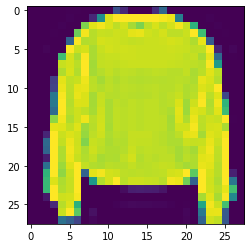

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
# Check out samples label
train_labels[7]

2

In [ ]:
# Create a small list so we can index onto our training labels so they're human-raedable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

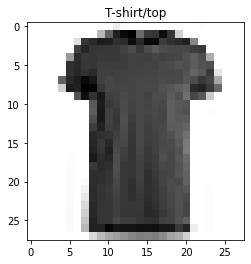

In [ ]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

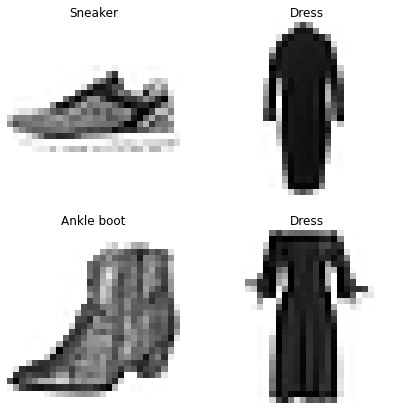

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = `tf.keras.losses.CategoricalCrossentropy()`
  * If your label s are one-hot encoded, use `CategoricalCrossentropy()`
  * If your labels are integer form use `SparseCategoricalCrossentropy()`
* Output layer activation = **Softmax** (not sigmoid)

In [ ]:
# Input shape
train_data[0].shape

(28, 28)

In [ ]:
# Output shape
len(class_names)

10

In [ ]:
# Our data needs to be flattened (from (28,28) to (None, 784))
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
                         tf.keras.layers.Flatten(input_shape=(28, 28)),  # tell the model that we passing it images that are the size of 28 x 28
                         tf.keras.layers.Dense(4, activation='relu'),
                         tf.keras.layers.Dense(4, activation='relu'),
                         tf.keras.layers.Dense(10, activation='softmax')
                         # alternatively activation=tf.keras.activations.softmax()
                         # we put 10 because we have 10 different classes  
])

# Compile the model
model_12.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    # we don't use `CategoricalCrossentropy()` because it expect us to be provided in a `one_hot` representation
    # if you want to provide labels as integers, please use `SparseCategoricalCrossentropy()`
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
non_norm_history = model_12.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7090 - accuracy: 0.2494 - val_loss: 1.6514 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6367 - accuracy: 0.2860 - val_loss: 1.6065 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6103 - accuracy: 0.2925 - val_loss: 1.6002 - val_accuracy: 0.3065
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5932 - accuracy: 0.3058 - val_loss: 1.5831 - val_accuracy: 0.3228
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5887 - accuracy: 0.3109 - val_loss: 1.5775 - val_accuracy: 0.2965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5750 - accuracy: 0.3196 - val_loss: 1.5609 - val_accuracy:

In [ ]:
# Using one-hot
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Create model using `one_hot` data

# set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
                         tf.keras.layers.Flatten(input_shape=(28, 28)),
                         tf.keras.layers.Dense(4, activation='relu'),
                         tf.keras.layers.Dense(4, activation='relu'),
                         tf.keras.layers.Dense(10, activation='softmax')  # alternatively activation=tf.keras.activations.softmax()     
])

# Compile the model
model_12.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
non_norm_history = model_12.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7090 - accuracy: 0.2494 - val_loss: 1.6514 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6367 - accuracy: 0.2860 - val_loss: 1.6065 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6103 - accuracy: 0.2925 - val_loss: 1.6002 - val_accuracy: 0.3065
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5932 - accuracy: 0.3058 - val_loss: 1.5831 - val_accuracy: 0.3228
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5887 - accuracy: 0.3109 - val_loss: 1.5775 - val_accuracy: 0.2965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5750 - accuracy: 0.3196 - val_loss: 1.5609 - val_accuracy:

In [ ]:
# Check the model summary
model_12.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized, let's build a model to find patterns in it

# Random set seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28, 28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
norm_history = model_13.fit(train_data_norm,
             train_labels,
             epochs=10,
             validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

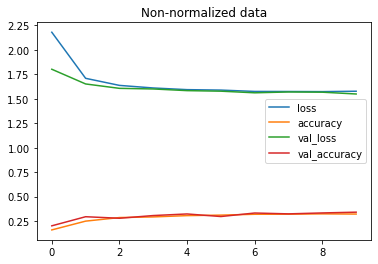

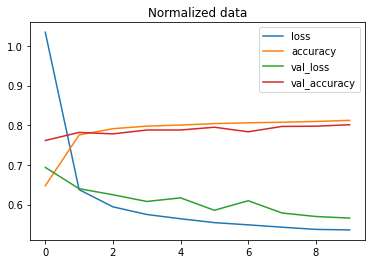

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')
# Plot normalized loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized data')

## Finding the ideal learning rate

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_14.fit(train_data_norm, train_labels, epochs=40, callbacks=[lr_scheduler], validation_data=(test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

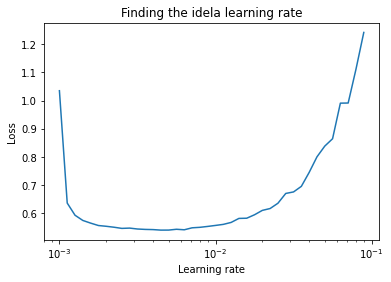

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the idela learning rate');

In [ ]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed

# Create the model
model_15 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28, 28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_15.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

# Fit the model
history_15 = model_15.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data=(test_data_norm, test_labels)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0966 - accuracy: 0.6275 - val_loss: 0.7959 - val_accuracy: 0.7328
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7063 - accuracy: 0.7535 - val_loss: 0.6690 - val_accuracy: 0.7627
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6184 - accuracy: 0.7861 - val_loss: 0.6178 - val_accuracy: 0.7841
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5817 - accuracy: 0.7986 - val_loss: 0.5948 - val_accuracy: 0.7950
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5615 - accuracy: 0.8047 - val_loss: 0.5959 - val_accuracy: 0.7876
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5451 - accuracy: 0.8095 - val_loss: 0.5637 - val_accuracy: 0.8024
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5350 - accuracy: 0.8119 - val_loss: 0.5496 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Asses some of its predictions (through visualization)
* Imrpove its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

In [ ]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cM = confusion_matrix(y_true, y_pred)
  cM_norm = cM.astype('float') / cM.sum(axis=1)[:, np.newaxis]  # normalize our confusion matrix
  n_classes = cM.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cM, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cM.shape[0])

  # Label the axes
  ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cM.max() + cM.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cM.shape[0]), range(cM.shape[1])):
    plt.text(j, i, f'{cM[i, j]} ({cM_norm[i, j]*100:.1f}%)',
            horizontalalignment='center',
            color='white' if cM[i, j] > threshold else 'black', size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# Make some predictions with our model
y_probs = model_15.predict(test_data_norm)  # probs is short for 'prediction probabilities'

# View the first 5 predictions
y_probs[:5]

array([[8.1524609e-05, 3.3946573e-15, 3.2584351e-06, 3.6896521e-09,
        8.8287928e-09, 2.3563386e-01, 6.8518420e-05, 3.7959807e-02,
        2.6363339e-03, 7.2361666e-01],
       [7.4671087e-04, 2.3220795e-11, 9.2823875e-01, 4.8261671e-07,
        1.0543335e-02, 1.4094762e-19, 6.0465019e-02, 1.7447403e-32,
        5.7704478e-06, 2.0923870e-13],
       [8.6239979e-08, 9.9879754e-01, 1.2734927e-06, 3.3866840e-05,
        1.1610959e-03, 5.2063558e-18, 4.7805033e-06, 3.9381196e-22,
        1.2669923e-06, 3.3702291e-20],
       [9.3153185e-06, 9.9333280e-01, 5.2955922e-05, 1.9811257e-03,
        4.5198854e-03, 6.9245880e-16, 9.9926066e-05, 1.4175721e-18,
        3.8867629e-06, 2.9158042e-16],
       [1.5497907e-01, 2.0924083e-06, 1.8395203e-01, 7.5024553e-03,
        4.0799227e-02, 8.0379713e-14, 6.0850471e-01, 1.6854689e-16,
        4.2604133e-03, 1.0498687e-08]], dtype=float32)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.1524609e-05, 3.3946573e-15, 3.2584351e-06, 3.6896521e-09,
        8.8287928e-09, 2.3563386e-01, 6.8518420e-05, 3.7959807e-02,
        2.6363339e-03, 7.2361666e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[725,   1,  23,  89,   4,   2, 139,   1,  13,   3],
       [  1, 941,  10,  38,   8,   0,   0,   0,   2,   0],
       [ 16,   4, 734,  12, 129,   0, 101,   0,   4,   0],
       [ 38,  10,  12, 844,  36,   0,  55,   0,   5,   0],
       [  0,   4, 128,  27, 724,   0, 111,   0,   6,   0],
       [  0,   1,   0,   1,   0, 923,   0,  38,   6,  31],
       [137,   3, 132,  49, 102,   3, 544,   1,  28,   1],
       [  0,   0,   0,   0,   0,  43,   0, 913,   1,  43],
       [  5,   1,   0,   6,   1,  12,  40,   6, 928,   1],
       [  2,   0,   0,   0,   0,  24,   0,  35,   0, 939]])

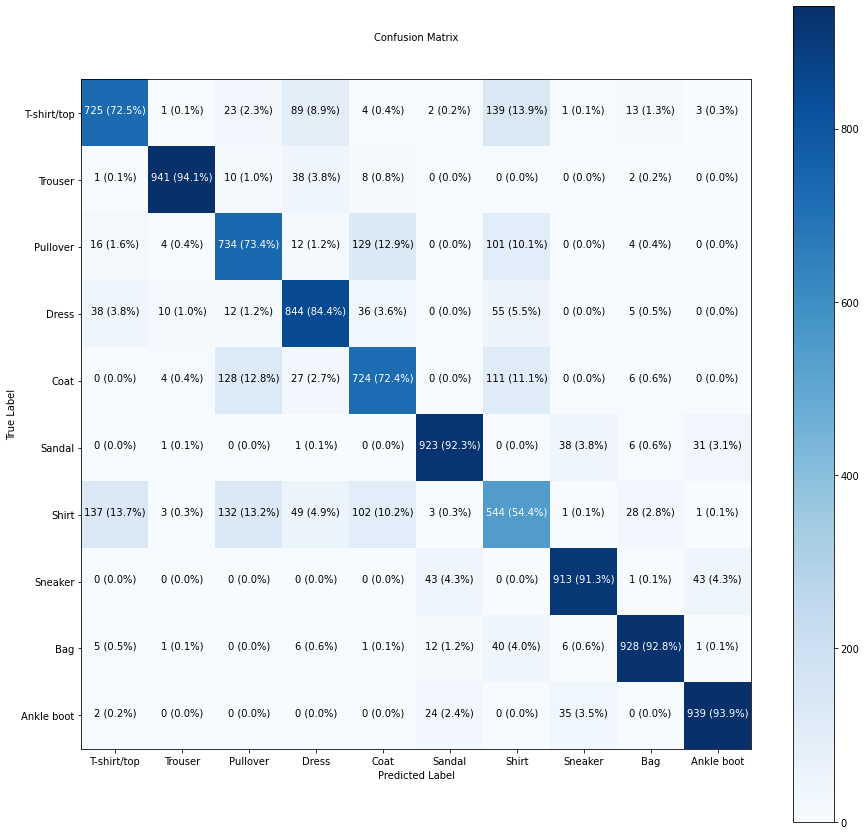

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

How about we create a fun little function for:

Plot a random image
Make a prediction on said image
Label the plot with truth label & the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  '''
  Picks a random image, plots it and labels it with a prediction and truth label.
  '''
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prdiction is right or wrong
  if pred_label == true_label:
    color='green'
  else:
    color='red'

  # Add xlabel information (prediction/true label)
  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)  # set the color to green or red based on if prediction is right or wrong

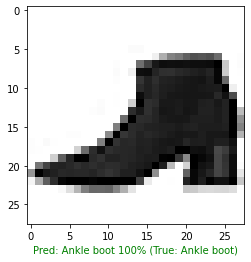

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_15,
                  images=test_data_norm,  # always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_15.layers

In [ ]:
# Extract a particular layer
model_15.layers[1]

In [ ]:
# Get a the patterns of a layer in our network
weights, biases = model_15.layers[1].get_weights()

# Shapes
weights, weights.shape
# (784, 4) means (the flatten layer to begin with, number of hidden units in our Dense layer)

(array([[ 0.79466164, -0.53290087,  0.5282738 , -0.5078691 ],
        [ 0.65571445, -0.937872  , -0.03041551,  0.02054468],
        [ 0.97588533, -0.5097976 , -0.15114488, -0.35570452],
        ...,
        [ 0.59827846,  0.73360866, -0.2521807 , -0.58987343],
        [ 0.34780738,  0.27296337,  0.31235898, -0.58146596],
        [ 0.7829902 ,  0.1281435 , -0.65446234, -0.25805998]],
       dtype=float32), (784, 4))

In [ ]:
model_15.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_14 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check out the biar vector...

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
biases, biases.shape

(array([0.71013516, 0.361872  , 0.60505205, 0.6615361 ], dtype=float32), (4,))

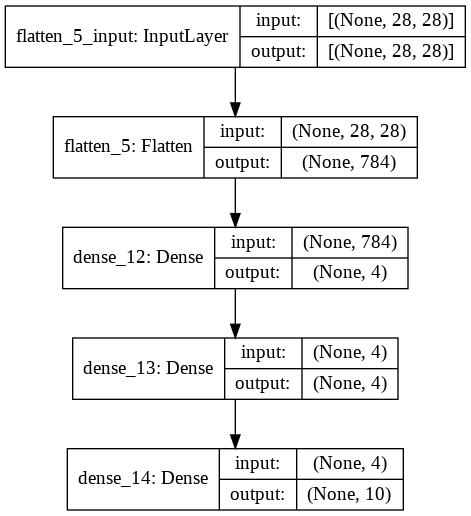

In [ ]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_15, show_shapes=True)